<a href="https://colab.research.google.com/github/dayekb/Study/blob/main/rus/UrFU/%D0%98%D0%BD%D1%82%D0%B5%D0%BB%D0%BB%D0%B5%D0%BA%D1%82%D1%83%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5%20%D0%B8%D0%BD%D1%84%D0%BE%D1%80%D0%BC%D0%B0%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5%20%D1%81%D0%B8%D1%81%D1%82%D0%B5%D0%BC%D1%8B%20%D0%B8%20%D1%82%D0%B5%D1%85%D0%BD%D0%BE%D0%BB%D0%BE%D0%B3%D0%B8%D0%B8%20%D0%B2%20%D0%BC%D0%B5%D0%B4%D0%B8%D1%86%D0%B8%D0%BD%D0%B5/2%20%D1%81%D0%B5%D0%B7%D0%BE%D0%BD/%D0%91%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D1%8B%20(ipynb)/ML_2_7_1_Neural_Networks_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импортируем библиотеки

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
plt.style.use('dark_background')

In [ ]:
!pip install -q git+https://github.com/tensorflow/docs
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

# Набор данных CIFAR с 10 классами

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
target_names=np.array(['airplane',
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck'])

**Размерность набора данных**

In [ ]:
train_images.shape

(50000, 32, 32, 3)

Нормировка

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

# Сверточная Нейронная Сеть






Добавим к полносвязным слоям регуляризацию и dropout

Чтобы были

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01),))
model.add(layers.Dropout(0.01))
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01),))
model.add(layers.Dropout(0.01))
model.add(layers.Dense(10))
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 32)                1

In [ ]:
history = model.fit(train_images, train_labels, 
                    validation_data=(test_images, test_labels), 
                    epochs=10)

Epoch 1/10
1563/1563 [==============================] - 58s 36ms/step - loss: 1.9038 - accuracy: 0.3496 - val_loss: 1.6306 - val_accuracy: 0.4472
Epoch 2/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.6029 - accuracy: 0.4577 - val_loss: 1.5110 - val_accuracy: 0.4953
Epoch 3/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.5035 - accuracy: 0.5014 - val_loss: 1.4310 - val_accuracy: 0.5233
Epoch 4/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.4385 - accuracy: 0.5279 - val_loss: 1.4016 - val_accuracy: 0.5437
Epoch 5/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.3930 - accuracy: 0.5437 - val_loss: 1.3609 - val_accuracy: 0.5579
Epoch 6/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.3531 - accuracy: 0.5609 - val_loss: 1.3246 - val_accuracy: 0.5715
Epoch 7/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.3354 - accuracy: 0.5696 - val_loss: 1.3436 -

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 1.2781 - accuracy: 0.5941 - 2s/epoch - 8ms/step

Test accuracy: 0.5940999984741211


# **Истории по Эпохам**

In [ ]:
 def plot_history(histories,y_min,y_max):   
    plt.figure(figsize=(20,10))
    plotter = tfdocs.plots.HistoryPlotter(metric = 'accuracy', smoothing_std=10,)
    plotter.plot(histories)
    plt.ylim([y_min, y_max])

In [ ]:
histories = {}

In [ ]:
histories['ConvNN'] = history

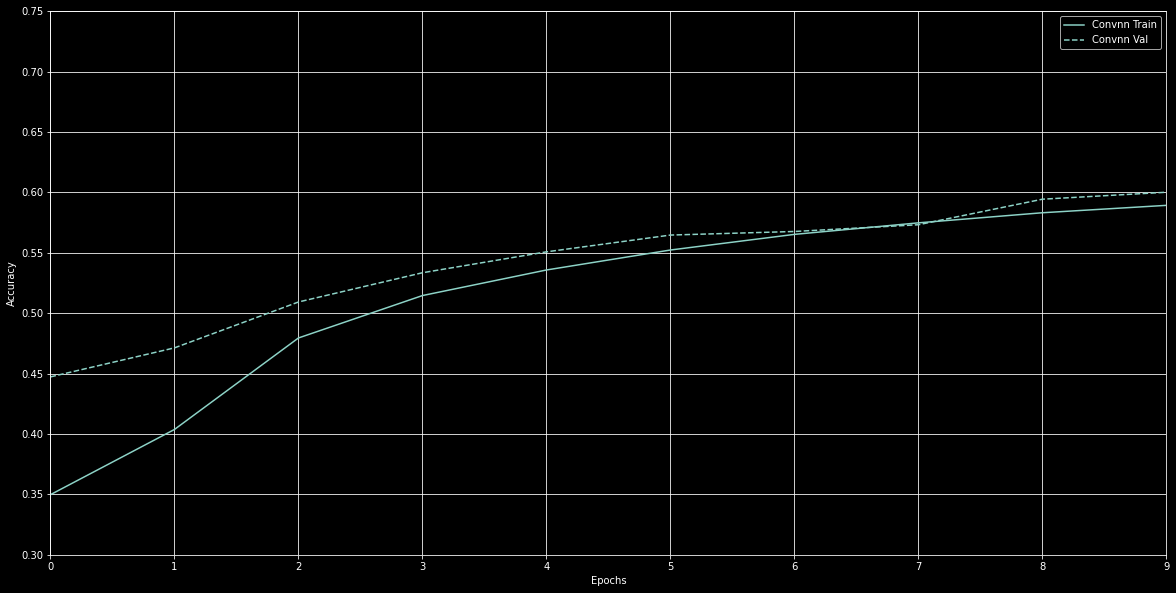

In [ ]:
plot_history(histories,0.3,0.75)

# **Анализируем Результат**

Предсказание Модели

Непонятные цифры

In [ ]:
prediction = model.predict(test_images)
prediction[0]

313/313 [==============================] - 3s 9ms/step


array([-1.3907734 , -3.1232717 ,  0.46423167,  2.2108474 , -2.6860974 ,
        1.8410363 , -0.85839605, -2.2576375 , -1.3760452 , -1.8869451 ],
      dtype=float32)

С помощью функции SoftMax - нормализуем предсказания

Так хоть адекватнеей выглядит (хотя формально шаг можно пропустить)

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
prediction = probability_model.predict(test_images)
prediction[0]

313/313 [==============================] - 3s 8ms/step


array([0.01359206, 0.00240365, 0.08687679, 0.49825227, 0.00372163,
       0.344225  , 0.02314695, 0.0057123 , 0.01379373, 0.00827562],
      dtype=float32)

Находим индекс соответсвующий максимуму предсказания

In [ ]:
label_predict=np.argmax(prediction,axis=1)
target_names[label_predict[0]]

'cat'

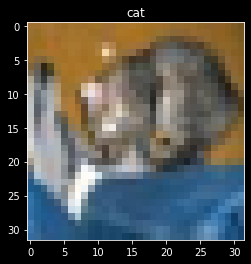

In [ ]:
plt.imshow(test_images[0])
plt.title(target_names[test_labels[0][0]]);

ура, котика определили

посмотрим не только лучшее предсказание, а отсортируем возможные классы по "уверенности"

In [ ]:
target_names[np.argsort(prediction[0])[::-1]]

array(['cat', 'dog', 'bird', 'frog', 'ship', 'airplane', 'truck', 'horse',
       'deer', 'automobile'], dtype='<U10')

# **Матрица Ошибок**

In [ ]:
def plot_confusion_matrix(y_true,y_predict,labels):
    confusion_mtx = tf.math.confusion_matrix(y_true, y_predict,) 
    confusion_mtx=np.round(confusion_mtx/np.sum(confusion_mtx,axis=1),2)
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_mtx, xticklabels=labels, yticklabels=labels, 
                annot=True, fmt='g')
    plt.xlabel('Prediction')
    plt.ylabel('Label')
    return confusion_mtx

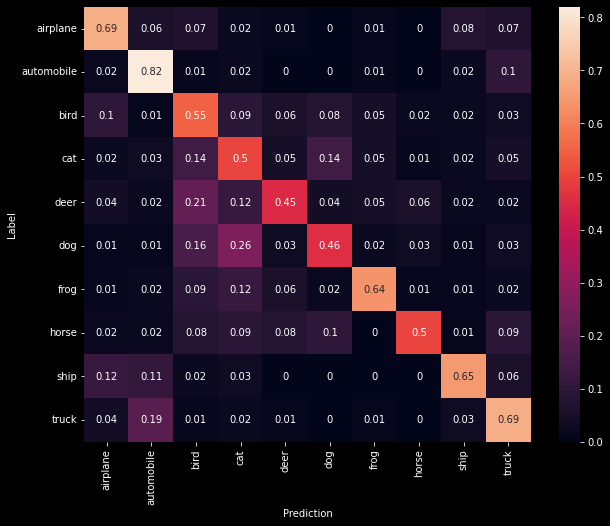

In [ ]:
cm=plot_confusion_matrix(test_labels,label_predict,target_names)

# Визуализация Весов

Функция для визуализации активаций после каждого слоя

Вдохновлено блокнотом из курса DeepLearning AI: 
TensorFlow Developer 

In [ ]:
def conv_layers_vis(features_map,layer_names):
    for layer_name, feature_map in zip(layer_names, successive_feature_maps):
        # Визуализируем только сверточные слои  
        if len(feature_map.shape) == 4:
         
            n_features = feature_map.shape[-1]  
            size       = feature_map.shape[ 1]  
            
            display_grid = np.zeros((size, size * n_features))
            
            # предобработка весов чтобы было чуть понятнее, что там происходит
            for i in range(n_features):
                x  = feature_map[0, :, :, i]
                x -= x.mean()
                x /= x.std ()
                x *=  64
                x += 128
                x  = np.clip(x, 0, 255).astype('uint8')
                display_grid[:, i * size : (i + 1) * size] = x

            # Визуализация
            scale = 25. / n_features
            plt.figure( figsize=(scale * n_features, scale) )
            plt.axis('off')
            plt.title ( layer_name )
            plt.grid  ( False )
            plt.imshow( display_grid, aspect='auto', cmap='seismic' ) 

Берем Случайное Изображение

Создаем новую модель

Которая в качестве входа использует изображение, а в качестве выходов - выходы после каждого слоя



1/1 [==============================] - 0s 102ms/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


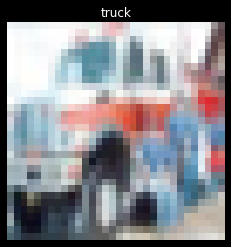

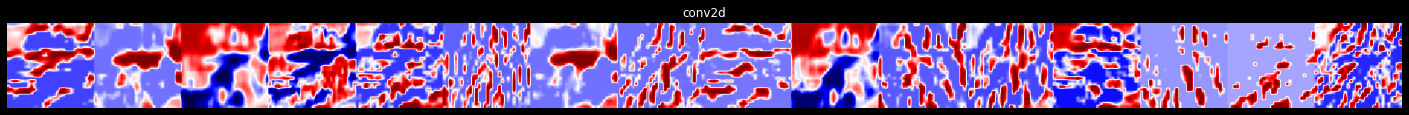

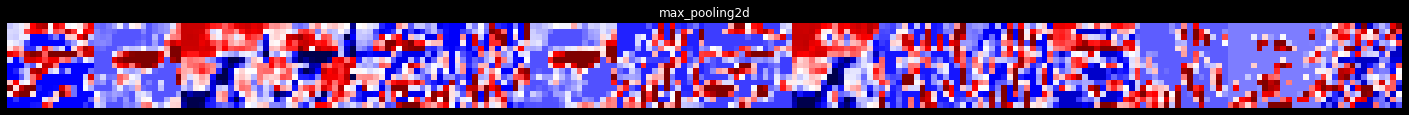

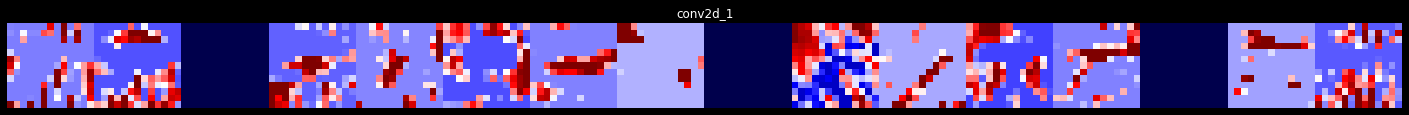

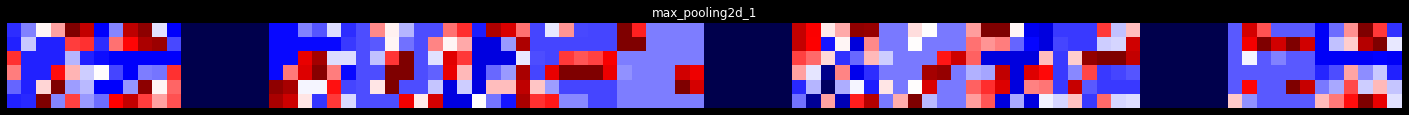

In [ ]:
index = random.randint(0,50000)

image = train_images[index]

plt.imshow(image)
plt.axis('off')
plt.title(target_names[train_labels[index][0]])
image   = image.reshape((1,) + image.shape) 

successive_outputs = [layer.output for layer in model.layers]

visualization_model = models.Model(inputs = model.input, outputs = successive_outputs)

successive_feature_maps = visualization_model.predict(image)
layer_names = [layer.name for layer in model.layers]

conv_layers_vis(successive_feature_maps,layer_names)

# Задание 

Используя манипуляции с архитектурой сверточной нейронной сети (количество слоев, количество сверток в слое, размер сверток, [функции активации](https://www.tensorflow.org/api_docs/python/tf/keras/activations), дополнительные полносвязные слои,количество эпох обучения, и т.д.) добейтесь точности на валидационной выборке не менее 0.70

При этом не забываем про переобучение - точность на тренировочной выборке не должна превышать валидационную более чем на 0.05
